In [1]:
!pip install scikit.image
!pip install matplotlib
!pip install numpy

In [2]:
import skimage
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.filters import threshold_triangle

In [3]:
print(skimage.__version__)

0.25.2


The following code is a breakdown of simple object detection using Scikit-image that I do for my research.

1. Reading the image tiff files. This is done using skimage's imread() function which uses it's own I/O module based on imageio, and stores the image as a NumPy Array of size (Height, Width, Channels).

In [4]:
image = imread("example_image.tiff") #The image
image_bg = imread("example_image_bg.tiff") #Background noise image
image = image - image_bg #Subtracting background noise from the image

2. Applying a gaussian blur using the skimage.filters.gaussian() function, in order reduce the noise in the image and prevent false detections

In [5]:
img_blur = skimage.filters.gaussian(image, sigma = 0.7) #Adding a gaussian blur to reduce the noise in the image

3. Determining a threshold, and applying it to the image to create a binary image, using threshold_triangle(). skimage also has other thresholding algorithms, but threshold_triangle finds the best threshold for my usecase

In [6]:
thresh_img = threshold_triangle(img_blur) 
binary_img = img_blur > thresh_img

4. Detecting "blob" using skimage's feature.blob_doh() function. There are other methods like blob_dog(), and blob_log() that can be used to detect a blob, but i found that blob_doh gives the most accurate results for my usecase 

In [7]:
blobs = skimage.feature.blob_doh(binary_img, threshold=0.01) 
transpose = np.transpose(blobs) #Finding the blob with the maximum standard deviation to find the most siginificant "blob"
index  = np.argmax(transpose[2])
roi = blobs[index]

5. Creating a bounding box around teh detected object and cropping image to the bounded box

In [8]:
roi_coordinates = (int(roi[0]), int(roi[0])+20, int(roi[1])-10, int(roi[1])+10) #Here the bounds of the image are manually adjusted to ensure the object is perfectly centred
img_roi = image[roi_coordinates[0]:roi_coordinates[1], roi_coordinates[2]:roi_coordinates[3]]

6. Displaying the image using imshow(). This can be either skimage.imshow(), or plt.imshow(), since skimage calls matplotlib under the hood and uses it's imshow anyway

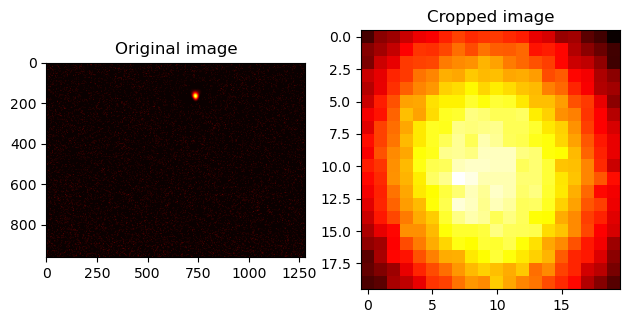

In [9]:
fig, ax = plt.subplots(1,2)
ax[0].imshow(image, cmap = "hot")
ax[1].imshow(img_roi, cmap = "hot")
ax[0].set_title("Original image")
ax[1].set_title("Cropped image")
fig.tight_layout()

In [10]:
fig.savefig("Project Image.png")